In [3]:
import pickle
import json
import sys
import os
import string
import requests
import ast  # for string to list: ast.literal_eval()
from bs4 import BeautifulSoup
import bs4
import time
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm
import warnings
data_dir = "/Users/vigadam/Documents/github/media_network/data/444/"

In [2]:
class Helper:
    import json

    from bs4 import BeautifulSoup
    import bs4

    import pandas as pd
    import numpy as np

    import re

    import warnings

    warnings.filterwarnings("ignore")

    def __init__(self, df):
        None

    def title_main(self, element, id):
        for i, soup in tqdm(enumerate(self.soups)):
            try:
                df.loc[self.soups.index[i], "Title"] = (
                    BeautifulSoup(soup).find(element, id=id).find("h1").get_text()
                )
            except AttributeError:
                df.loc[self.soups.index[i], "Title"] = None

    def link(self):
        for i, soup in tqdm(enumerate(self.soups)):
            soup_for_links = BeautifulSoup(soup).find_all("a")
            link_list = []
            for item in soup_for_links:
                if type(item.get("href")) == str:
                    link_list.append(item.get("href"))
            df.loc[self.soups.index[i], "links"] = str(list(set(link_list)))

    def text_main(self, element, class_id):
        for i, soup in tqdm(enumerate(self.soups)):
            try:
                soup_for_text = (
                    BeautifulSoup(soup)
                    .find(element, class_=re.compile(class_id))
                    .find_all("p")
                )
                text_list = []
                for item in soup_for_text:
                    if soup_for_text != "":
                        text_list.append(item.text)
                df.loc[self.soups.index[i], "Text"] = " ".join(text_list)
            except AttributeError:
                df.loc[self.soups.index[i], "Text"] = None

    def author_main(self, element, class_id):
        for i, soup in tqdm(enumerate(self.soups)):
            try:
                df.loc[self.soups.index[i], "Author"] = (
                    BeautifulSoup(soup)
                    .find(element, class_=class_id)
                    .get_text()
                    .strip()
                )
            except:
                df.loc[self.soups.index[i], "Author"] = None

    def category_main(self, element, id_):
        for i, soup in tqdm(enumerate(self.soups)):
            try:
                df.loc[self.soups.index[i], "Category"] = (
                    BeautifulSoup(soup).find(attrs={element: id_}).text.strip()
                )

            except:
                df.loc[self.soups.index[i], "Category"] = None

    def tags_main(self, element, id_):
        for i, soup in tqdm(enumerate(self.soups)):
            try:
                df.loc[self.soups.index[i], "Tags"] = (
                    BeautifulSoup(soup)
                    .find(attrs={element: id_}).text.strip()
                )

            except:
                df.loc[self.soups.index[i], "Tags"] = None
        df["Tags"] = df["Tags"].str.split("\n\n\n")

    def clean(self):
        self.title()
        self.text()
        self.link()
        self.author()
        self.category()
        self.tags()

In [3]:
class _444(Helper):
    def __init__(self, df):
        page = "444"
        self.data = df.loc[df["page"] == page]
        self.soups = self.data["soup"].dropna()

    def title(self):
        Helper.title_main(self, "div", "headline")

    def link(self):
        for i, soup in tqdm(enumerate(self.soups)):
            if len(BeautifulSoup(soup).find_all("article")) != 0:
                soup_for_links = (
                    BeautifulSoup(soup).find_all("article")[0].find_all("a")
                )
                link_list = []
                for item in soup_for_links:
                    if type(item.get("href")) == str:
                        link_list.append(item.get("href"))
                df.loc[self.soups.index[i], "links"] = str(list(set(link_list)))
            else:
                df.loc[self.soups.index[i], "links"] = []

    def text(self):
        Helper.text_main(self, "main", "col-xs-12 col-md-8 col-lg-7")

    def author(self):
        Helper.author_main(self, "span", "byline__authors")

    def category(self):
        Helper.category_main(self, "class", "byline__category")

    def tags(self):
        Helper.tags_main(self, "class", "tag-list__items")
        
    def category_and_tags(self):
        for i, soup in tqdm(enumerate(self.soups)):
            try:
                df.loc[self.soups.index[i], "Category"] = (
                    BeautifulSoup(soup).find(attrs={"class":"byline__category"}).text.strip()
                )

            except:
                df.loc[self.soups.index[i], "Category"] = None
            
            try:
                df.loc[self.soups.index[i], "Tags"] = (
                    BeautifulSoup(soup)
                    .find(attrs={"class": "tag-list__items"}).text.strip()
                )

            except:
                df.loc[self.soups.index[i], "Tags"] = None
        df["Tags"] = df["Tags"].str.split("\n\n\n")    

In [15]:
data_list = [
    "month_04_soups.pkl",
    "month_12_soups.pkl",
    "month_03_soups.pkl",
    "month_06_soups.pkl",
    "month_07_soups.pkl",
    "month_02_soups.pkl",
    "month_10_soups.pkl",
    "month_08_soups.pkl",
    "month_05_soups.pkl",
    "month_11_soups.pkl",
    "month_01_soups.pkl",
    "month_09_soups.pkl",
]

data_files = [data_dir + item for item in data_list]

In [5]:
df_clean = pd.DataFrame()
for data_month in tqdm(data_files):

    df = pd.read_pickle(data_files)
    df["page"] = "444"

    _444(df).category_and_tags()


    df_clean = pd.concat([df_clean, df.drop(columns=["Unnamed: 0", "soup"])])

In [30]:
df_clean

,link,year,date,month,page,Category,Tags
0,https://444.hu/2020/04/30/kina-kihagyna-a-who-...,2020,2020-04-30,4,444,koronavírus,"[járvány, kína, who, koronavírus, kutatás]"
1,https://444.hu/2020/04/30/a-magyar-kormany-is-...,2020,2020-04-30,4,444,SPORT,"[formula 1, hungaroring]"
2,https://444.hu/2020/04/30/ingyenesen-tesztelik...,2020,2020-04-30,4,444,Külföld,"[los angeles, tesztelés, koronavírus]"
3,https://444.hu/2020/04/30/ralott-egy-torok-kat...,2020,2020-04-30,4,444,Külföld,"[Törökország, Frontex, .görögország]"
4,https://444.hu/2020/04/30/europai-menekultugyi...,2020,2020-04-30,4,444,EU,"[EASO, európai menekültügyi támogatási hivatal..."
...,...,...,...,...,...,...,...
1373,https://444.hu/2020/09/01/husangokkal-utottek-...,2020,2020-09-01,9,444,bűnügy,"[gödöllő, bot, karó, husáng, rendőrség]"
1374,https://444.hu/2020/09/01/trump-hires-tamogato...,2020,2020-09-01,9,444,külföld,"[herman cain, egyesült államok, járvány, ko..."
1375,https://444.hu/2020/09/01/tobb-szazan-ragadtak...,2020,2020-09-01,9,444,külföld,"[vonat, TGV, franciaország]"
1376,https://444.hu/2020/09/01/uj-alaptantervvel-is...,2020,2020-09-01,9,444,oktatás,"[iskola, tanév, járvány, koronavírus, covid-..."


In [ ]:
text_data = pd.concat([pd.read_pickle(data_dir + "444_clean.pkl"),df.drop(columns=["Unnamed: 0","soup"])])

In [41]:
data_444_clean = (
    pd.merge(text_data, df_clean[["link", "Category", "Tags"]], on="link", how="inner")
    .dropna()
    .reset_index(drop=True)
)

In [42]:
data_444_clean["Tags"] = data_444_clean["Tags"].apply(lambda x: [tag.strip().lower() for tag in x])
data_444_clean["Category"] = data_444_clean["Category"].str.lower()

In [4]:
data_444_clean = pd.read_pickle(data_dir + "data_444_clean.pkl")

In [11]:
data_444_clean.loc[0,"links"]

"['https://go.eu.bbelements.com/please/redirect/18785/2/5/2/', 'https://444.hu/tag/kina', 'https://twitter.com/intent/tweet?text=K%C3%ADna+kihagyn%C3%A1+a+WHO-t+a+koronav%C3%ADrus+eredet%C3%A9nek+felkutat%C3%A1s%C3%A1b%C3%B3l++https%3A%2F%2F444.hu%2F2020%2F04%2F30%2Fkina-kihagyna-a-who-t-a-koronavirus-eredetenek-felkutatasabol', 'https://444.hu/tag/who', 'https://444.hu/tag/koronavirus', 'https://444.hu/tag/kutatas', 'https://www.tumblr.com/share?v=3&u=https%3A%2F%2F444.hu%2F2020%2F04%2F30%2Fkina-kihagyna-a-who-t-a-koronavirus-eredetenek-felkutatasabol&t=K%C3%ADna+kihagyn%C3%A1+a+WHO-t+a+koronav%C3%ADrus+eredet%C3%A9nek+felkutat%C3%A1s%C3%A1b%C3%B3l+', 'https://www.facebook.com/share.php?u=https%3A%2F%2F444.hu%2F2020%2F04%2F30%2Fkina-kihagyna-a-who-t-a-koronavirus-eredetenek-felkutatasabol&title=K%C3%ADna+kihagyn%C3%A1+a+WHO-t+a+koronav%C3%ADrus+eredet%C3%A9nek+felkutat%C3%A1s%C3%A1b%C3%B3l+', 'https://pinterest.com/pin/create/button/?url=https%3A%2F%2F444.hu%2F2020%2F04%2F30%2Fkina-ki

In [10]:
data_444_clean.loc[0,"link"]

'https://444.hu/2020/04/30/kina-kihagyna-a-who-t-a-koronavirus-eredetenek-felkutatasabol'

In [52]:
data_444_clean["covid_tag"] = data_444_clean["Tags"].apply(lambda x: "koronavírus" in x)

<AxesSubplot:>

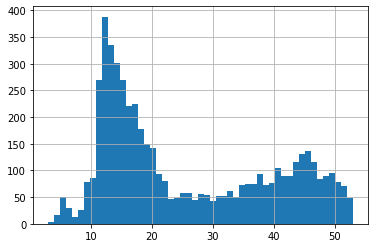

In [80]:
data_444_clean.sort_values(by=["date"]).loc[data_444_clean["covid_tag"],"week"].hist(bins=51)

In [83]:
import seaborn as sns

<AxesSubplot:xlabel='week', ylabel='freq'>

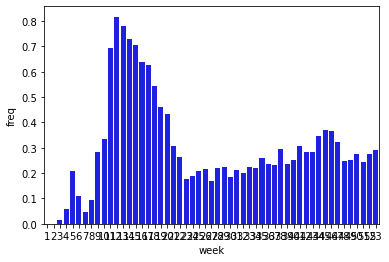

In [90]:
sns.barplot(
    data=data_444_clean.groupby("week")
    .agg(n=("link", "count"), covid=("covid_tag", sum))
    .assign(freq=lambda x: x["covid"] / x["n"])
    .reset_index(),
    x="week",
    y="freq",
    color="blue",
)

In [178]:
countries = [
    "kína",
    "olaszország",
    "spanyolország",
    "portugália",
    "franciaország",
    "hollandia",
    "luxemburg",
    "belgium",
    "németország",
    "szlovákia",
    "szlovénia",
    "lengyelország",
    "horvátország",
    "írország",
    "ausztria",
    "csehország",
]


country_sample = [
    "kína",
    "olaszország",
    "spanyolország",
    "franciaország",
    "németország",
    "ausztria",
    "csehország",
]

In [94]:
for country in countries:
    data_444_clean["{country}_tag".format(country=country)] = data_444_clean[
        "Tags"
    ].apply(lambda x: country in x)

In [184]:
country_cols = ["{country}_tag".format(country=country) for country in countries]

country_sample_cols = ["{country}_tag".format(country=country) for country in country_sample]

In [112]:
data_444_clean["country"]=data_444_clean[country_cols].sum(axis=1)

In [12]:
data_444_clean

,link,year,date,month,page,Title,Text,links,Author,Category,Tags
0,https://444.hu/2020/04/30/kina-kihagyna-a-who-...,2020,2020-04-30,4,444,Kína kihagyná a WHO-t a koronavírus eredetének...,Többszöri kérésére is megtagadta a kínai kormá...,['https://go.eu.bbelements.com/please/redirect...,Neuberger Eszter,koronavírus,"[járvány, kína, who, koronavírus, kutatás]"
1,https://444.hu/2020/04/30/a-magyar-kormany-is-...,2020,2020-04-30,4,444,"""A magyar kormány is szeretné, ha lenne a Hung...","""Naponta, kétnaponta egyeztetünk a kereskedelm...",['https://www.facebook.com/share.php?u=https%3...,Botos Tamás,sport,"[formula 1, hungaroring]"
2,https://444.hu/2020/04/30/ingyenesen-tesztelik...,2020,2020-04-30,4,444,Ingyenesen tesztelik a lakosságot Los Angelesben,A teljes lakosságnak ingyenes koronavírus-tesz...,['https://www.bbc.com/news/world-us-canada-524...,Neuberger Eszter,külföld,"[los angeles, tesztelés, koronavírus]"
3,https://444.hu/2020/04/30/ralott-egy-torok-kat...,2020,2020-04-30,4,444,Rálőtt egy török katona a Frontex egyik járőrére,Kedd este tüzet nyitott egy török katona a tör...,"['https://444.hu/tag/torokorszag', 'https://44...",Botos Tamás,külföld,"[törökország, frontex, .görögország]"
4,https://444.hu/2020/04/30/europai-menekultugyi...,2020,2020-04-30,4,444,Európai Menekültügyi Hivatal: 43 százalékkal e...,Az előző havi adatokhoz képest márciusban 43 s...,['https://go.eu.bbelements.com/please/redirect...,Neuberger Eszter,eu,"[easo, európai menekültügyi támogatási hivatal..."
...,...,...,...,...,...,...,...,...,...,...,...
15973,https://444.hu/2020/03/01/drasztikusan-csokken...,2020,2020-03-01,3,444,Drasztikusan csökken a kínai légszennyezettség...,Műholdképek tanúsága szerint drasztikusan eset...,['https://www.tumblr.com/share?v=3&u=https%3A%...,Sarkadi Zsolt,külföld,"[kína, nasa, vuhan-vírus, koronavírus, covid-1..."
15974,https://444.hu/2020/03/01/hetfotol-5-masodperc...,2020,2020-03-01,3,444,Hétfőtől 5 másodpercen belül célba ér a banki ...,Hétfőn elindul az azonnali fizetési rendszer: ...,['https://pinterest.com/pin/create/button/?url...,Sarkadi Zsolt,gazdaság,"[bank, azonnali fizetés, banki átutalás]"
15975,https://444.hu/2020/03/01/biden-gyozott-a-del-...,2020,2020-03-01,3,444,Biden győzött a dél-karolinai előválasztáson,A demokraták dél-karolinai előválasztásán Joe ...,"['https://membership.444.hu', 'https://444.hu/...",Sarkadi Zsolt,külföld,"[amerikai egyesült államok, egyesült államok, ..."
15976,https://444.hu/2020/03/01/vilagszerte-no-a-kor...,2020,2020-03-01,3,444,Világszerte nő a koronavírus fertőzöttjeinek s...,Vasárnap meghalt Perthben egy 78 éves ausztrál...,"['https://444.hu/tag/iran', 'https://go.eu.bbe...",Sarkadi Zsolt,egészségügy,"[koronavírus, vuhan-vírus, kína, who, irán, ká..."


In [185]:
grouped = data_444_clean.groupby("week").sum().reset_index()

grouped_perc = grouped[country_sample_cols].divide(grouped[country_sample_cols].sum(axis=1), axis=0)

In [199]:
grouped_perc.round(2)

,kína_tag,olaszország_tag,spanyolország_tag,franciaország_tag,németország_tag,ausztria_tag,csehország_tag
0,0.20,0.25,0.00,0.05,0.30,0.15,0.05
1,0.21,0.16,0.05,0.16,0.37,0.05,0.00
2,0.35,0.08,0.12,0.12,0.15,0.12,0.08
3,0.73,0.00,0.07,0.03,0.13,0.03,0.00
4,0.51,0.08,0.00,0.18,0.15,0.05,0.03
5,0.73,0.08,0.03,0.00,0.16,0.00,0.00
6,0.42,0.12,0.00,0.27,0.15,0.04,0.00
7,0.31,0.28,0.00,0.06,0.31,0.00,0.03
8,0.19,0.35,0.07,0.07,0.21,0.09,0.02
9,0.23,0.41,0.00,0.14,0.18,0.05,0.00


In [1]:
grouped_perc

NameError: name 'grouped_perc' is not defined

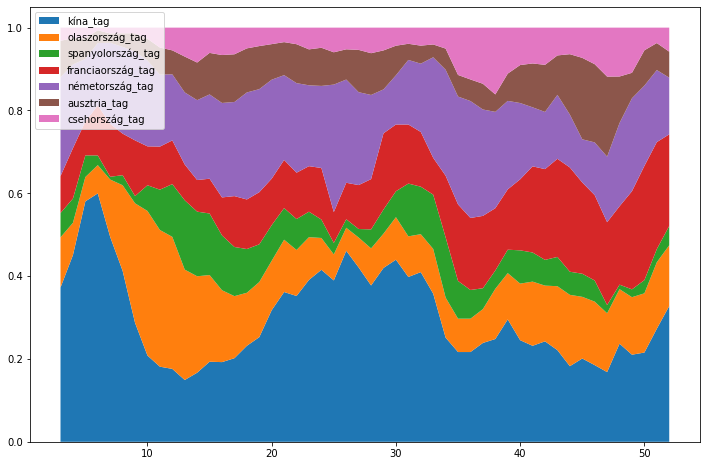

In [205]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.stackplot(
    range(1, 54),
    grouped_perc.rolling(4, center=True).mean().T,
    labels=country_sample_cols,
)
plt.legend(loc="upper left")

plt.show()

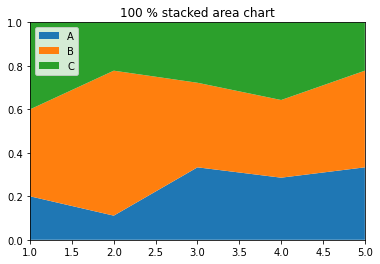

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
# Make the plot
plt.stackplot(range(1,6),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['A','B','C'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()


(0.0, 51.0)

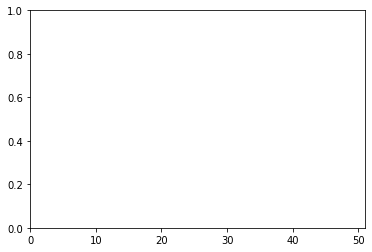

In [141]:
plt.xlim([0,51])

In [144]:
fig, ax= plt.figure(figsize=(12, 6))

TypeError: cannot unpack non-iterable Figure object

<Figure size 864x432 with 0 Axes>

dtype('int64')

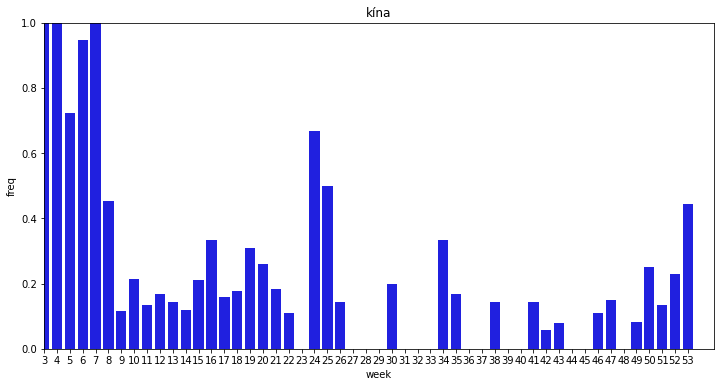

KeyboardInterrupt: 

In [152]:
for country in country_cols:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    sns.barplot(
        data=data_444_clean.loc[(data_444_clean["covid_tag"])&(data_444_clean["country"])]
        .groupby("week")
        .agg(n=("link", "count"), covid=(country, sum))
        .assign(freq=lambda x: x["covid"] / x["n"])
        .reset_index(),
        x="week",
        y="freq",
        color="blue",
        ax=ax
    )
    
    ax.set_xlim([0, 52])
    ax.set_ylim([0, 1])
    plt.title(country.split("_")[0])
    plt.show()

In [65]:
data_444_clean["date"] = data_444_clean["date"].apply(
    lambda x: datetime.strptime(x, "%Y-%m-%d")
)

In [72]:
data_444_clean["week"] =  data_444_clean["date"].apply(lambda x: datetime.isocalendar(x)[1])

In [71]:
data_444_clean["covid_tag"] = data_444_clean["Tags"].apply(lambda x: "koronavírus" in x)

In [81]:
df_v0 = pd.read_pickle(data_dir + "444_clean.pkl").reset_index()

In [84]:
df_v0

,index,link,year,date,month,page,Title,Text,links,Author
0,0,https://444.hu/2020/04/30/kina-kihagyna-a-who-...,2020,2020-04-30,4,444,Kína kihagyná a WHO-t a koronavírus eredetének...,Többszöri kérésére is megtagadta a kínai kormá...,['https://go.eu.bbelements.com/please/redirect...,Neuberger Eszter
1,1,https://444.hu/2020/04/30/a-magyar-kormany-is-...,2020,2020-04-30,4,444,"""A magyar kormány is szeretné, ha lenne a Hung...","""Naponta, kétnaponta egyeztetünk a kereskedelm...",['https://www.facebook.com/share.php?u=https%3...,Botos Tamás
2,2,https://444.hu/2020/04/30/ingyenesen-tesztelik...,2020,2020-04-30,4,444,Ingyenesen tesztelik a lakosságot Los Angelesben,A teljes lakosságnak ingyenes koronavírus-tesz...,['https://www.bbc.com/news/world-us-canada-524...,Neuberger Eszter
3,3,https://444.hu/2020/04/30/ralott-egy-torok-kat...,2020,2020-04-30,4,444,Rálőtt egy török katona a Frontex egyik járőrére,Kedd este tüzet nyitott egy török katona a tör...,"['https://444.hu/tag/torokorszag', 'https://44...",Botos Tamás
4,4,https://444.hu/2020/04/30/europai-menekultugyi...,2020,2020-04-30,4,444,Európai Menekültügyi Hivatal: 43 százalékkal e...,Az előző havi adatokhoz képest márciusban 43 s...,['https://go.eu.bbelements.com/please/redirect...,Neuberger Eszter
...,...,...,...,...,...,...,...,...,...,...
14270,1373,https://444.hu/2020/09/01/husangokkal-utottek-...,2020,2020-09-01,9,444,"Husángokkal ütöttek, akit értek egy gödöllői s...",A rendőrség hétfőn este 11 óra körül kapott be...,"['https://444.hu/tag/bot', 'https://444.hu/tag...",Szurovecz Illés
14271,1374,https://444.hu/2020/09/01/trump-hires-tamogato...,2020,2020-09-01,9,444,Trump híres támogatója belehalt a koronavírusb...,Furcsa tweetek jelentek meg a júliusban korona...,['https://go.eu.bbelements.com/please/redirect...,Szurovecz Illés
14272,1375,https://444.hu/2020/09/01/tobb-szazan-ragadtak...,2020,2020-09-01,9,444,Több százan ragadtak egy francia vonaton,Közel ezer embert szállított a Pireneusokból P...,"['https://444.hu/tag/tgv', 'https://go.eu.bbel...",Szurovecz Illés
14273,1376,https://444.hu/2020/09/01/uj-alaptantervvel-is...,2020,2020-09-01,9,444,"Új alaptantervvel, iskolaőrökkel és járvánnyal...","1,2 millió diák kezdi az új tanévet kedden reg...","['https://444.hu/tag/nemzeti-alaptanterv', 'ht...",Szurovecz Illés
